# University Housing - Primaries


An investigation of voter turnout in September Primary Elections

In [2]:
# %matplotlib ipympl
from datetime import timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ma_voter_analysis.plotting import *
from ma_voter_analysis.processing import *
from ma_voter_analysis.university import *

In [11]:
figsize = (16, 8)

YEARS = [2012, 2014, 2016, 2018, 2020, 2022]
challenger_years = [2012, 2014, 2016, 2018]

cur_registered_df = pd.read_csv("../../data/cambridge/cur_registered.csv", low_memory=False)
primary = (
    pd.read_csv("../../data/cambridge/sept-primaries-history.csv", low_memory=False)
    .rename({"Unnamed: 0": "year"}, axis=1)
    .set_index(["year", "Voter ID Number"])
)
# general = pd.read_csv(
#     "../../data/cambridge/general-vote-history.csv", low_memory=False
# ).set_index(["year", "Voter ID Number"])
# primary["Party Affiliation"] = primary["Party Affiliation"].str.strip()
# general = general[general["State Representative District"] == 142]


In [9]:
# primary = primary[primary["Party Affiliation"].isin(["D", "U"])]
# general = general[general["Party Affiliation"].isin(["D", "U"])]

primary["univ_housing_name"] = ""
gsas_idx = find_housing_idxs(primary, gsas_dorms)
harvard_ugrad_idx = find_housing_idxs(primary, harvard_ugrad_houses)
hvd_law_idx = find_housing_idxs(primary, hvd_law_dorms)
harvard_housing_idx = find_housing_idxs(primary, harvard_housing)
harvard_1st_idx = find_housing_idxs(primary, harvard_1st_year)
mit_ugrad_idx = find_housing_idxs(primary, mit_dorms)
mit_grad_idx = find_housing_idxs(primary, mit_grad_housing)
lesley_housing_idx = find_housing_idxs(primary, lesley_housing)

## Harvard College
### Harvard First Year Houses

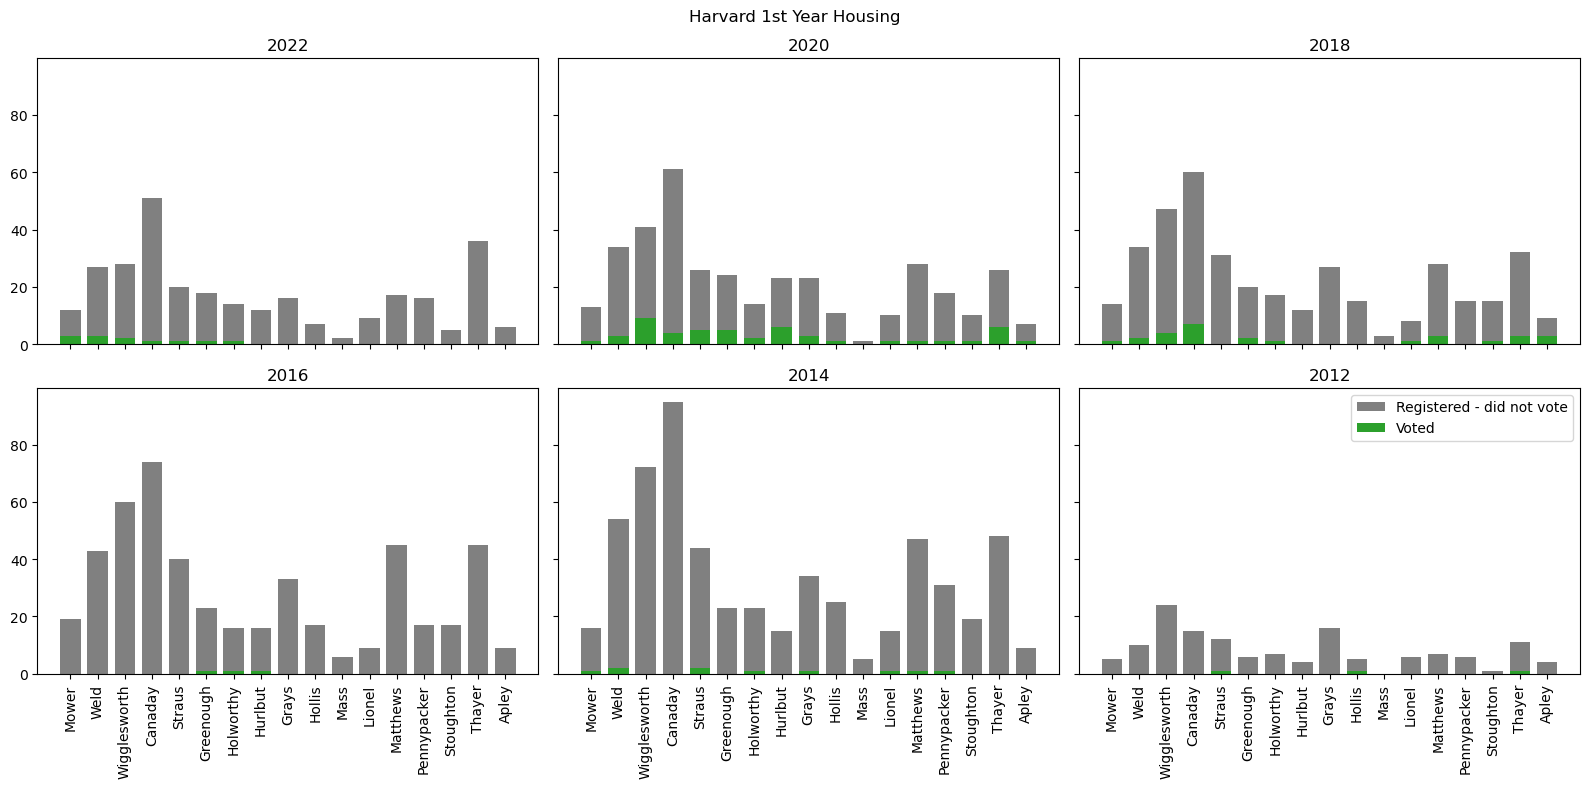

In [10]:
fig, axs = multi_year_bar(
    primary, university_housing_bar_chart, idx=harvard_1st_idx["all"], figsize=figsize
)
fig.suptitle("Harvard 1st Year Housing")
ax = axs[-1, -1]
ax.set_xticks(
    ax.get_xticks(), labels=[l.get_text().split()[0] for l in ax.get_xticklabels()]
)
plt.legend()
plt.tight_layout()

### Harvard Undergraduate Houses


In [ ]:
fig, axs = multi_year_bar(
    primary, university_housing_bar_chart, idx=harvard_ugrad_idx["all"], figsize=figsize
)
fig.suptitle("Harvard Undergrad Houses turnout")
ax = axs[-1, -1]
ax.set_xticks(
    ax.get_xticks(), labels=[l.get_text().split()[0] for l in ax.get_xticklabels()]
)
plt.legend()
plt.tight_layout()

### Harvard Grad Dorms

In [ ]:
fig, axs = multi_year_bar(
    primary, university_housing_bar_chart, idx=gsas_idx["all"], figsize=figsize
)
fig.suptitle("Harvard GSAS Dorms Turnout")
ax = axs[-1, -1]
ax.set_xticks(
    ax.get_xticks(), labels=[l.get_text().split()[0] for l in ax.get_xticklabels()]
)
plt.legend()
plt.tight_layout()

### Harvard University Housing


[Harvard University Housing](https://www.huhousing.harvard.edu/) is separate from the grad dorms and undergrad house system. They rent out apartments to graduate students. A map of their properties can be found [here](https://osa.gse.harvard.edu/files/gse-osa/files/hu_housing_map.pdf)


Every Harvard Housing property in Cambridge is the 25th Middlesex State House District.



In [ ]:
fig, axs = multi_year_bar(
    primary,
    university_housing_bar_chart,
    idx=harvard_housing_idx["all"],
    figsize=figsize,
)
fig.suptitle("Harvard Grad Housing Turnout")
plt.legend()
plt.tight_layout()

### Harvard Law School Dorms


In [ ]:
fig, axs = multi_year_bar(
    primary, university_housing_bar_chart, idx=hvd_law_idx["all"], figsize=figsize
)
fig.suptitle("Harvard Law Dorms Turnout")
ax = axs[-1, -1]
ax.set_xticks(
    ax.get_xticks(), labels=[l.get_text().split()[0] for l in ax.get_xticklabels()]
)
plt.legend()
plt.tight_layout()

### All Harvard Dorms/Housing

In [ ]:
# %matplotlib ipympl

df = turnout_by_year_key(primary, "univ_housing_name")

# groupby is the easiest way i could see to get the order I wanted
# couldn't get the reorder levels to work properly :/
df = df.groupby(["univ_housing_name", "year"]).mean()
housing_sets = [
    harvard_1st_year,
    harvard_ugrad_houses,
    gsas_dorms,
    harvard_housing,
    hvd_law_dorms,
]
fig, axs = plt.subplots(len(housing_sets), 3, figsize=(16, 20))
for row, buildings in enumerate(housing_sets):
    for building in buildings:
        axs[row][0].plot(
            df.loc[building]["registered"], "o--", label=building.split()[0]
        )
        axs[row][1].plot(df.loc[building]["voted"], "o--", label=building.split()[0])
        axs[row][2].plot(df.loc[building]["turnout"] * 100, "o--", label=building)
    axs[row][0].set_title("Registered")
    axs[row][1].set_title("Voted")
    axs[row][2].set_title("Turnout %")
    axs[row, 2].legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    axs[row, 2].set_ylim([0, 100])
plt.tight_layout()

## Harvard Undergraduate Total turnout

Because the harvard undegraduate population nearly entirely lives in the house system we can assess the turnout of Harvard Undergraduates as a whole based on the enrollment numbers available from the [Harvard Factbook](https://oira.harvard.edu/factbook/fact-book-enrollment/).

Unfortunately the breakdown of international or US citizen is currently only available for 2022/2023. But based on some very cursory googling it seem that each year has 10-15% international enrollment. So for the following analysis we will assume 12.5% international undergraduates at Harvard.

The big takeaway here is that Harvard Undergraduates have barely voted in any state level primaries over the past decade.


In [ ]:
hvd_college_enrollment = pd.Series(
    {
        2013: 6671,
        2014: 6636,
        2015: 6634,
        2016: 6645,
        2017: 6699,
        2018: 6722,
        2019: 6716,
        2020: 5212,
        2021: 7095,
        2022: 7178,
    }
)

# pd.Series(hvd_college_enrollment)

In [ ]:
all_hvd_ugrad = pd.DataFrame(primary[harvard_1st_idx["all"] | harvard_ugrad_idx["all"]])
# all_hvd_ugrad = pd.DataFrame(voters[mit_ugrad_idx['all']])
all_hvd_ugrad
all_hvd_ugrad["registered"] = 1
hvd_yearly_turnout = (
    all_hvd_ugrad.reset_index().groupby("year").sum()[["voted", "registered"]]
)
hvd_yearly_turnout["turnout %"] = (
    100 * hvd_yearly_turnout["voted"] / hvd_yearly_turnout["registered"]
)
hvd_yearly_turnout["enrollment"] = hvd_college_enrollment
hvd_yearly_turnout["us-citizens"] = hvd_yearly_turnout["enrollment"] * (1 - 0.125)
hvd_yearly_turnout["registered-percent"] = 100 * (
    hvd_yearly_turnout["registered"] / hvd_yearly_turnout["us-citizens"]
)
hvd_yearly_turnout

In [ ]:
plt.figure()
plt.title("Harvard Undergrads Registration and Voting Percentages")
(hvd_yearly_turnout["registered-percent"]).plot(
    marker="o", label="% of ugrads Registered"
)
(hvd_yearly_turnout["turnout %"]).plot(
    marker="o", label="% Registered Ugrads who Voted"
)
plt.ylabel("%")
plt.legend()
plt.tight_layout()

In [ ]:
plt.figure()
plt.title("Harvard Undergrads Absolute Registration and Voters")
hvd_yearly_turnout["registered"].plot(marker="o", label="# Registered")
hvd_yearly_turnout["voted"].plot(marker="o", label="# Voted")
plt.ylabel("Number of People")
plt.legend()
plt.tight_layout()

## MIT
### MIT Undergraduate Dorms


In [ ]:
primary[mit_ugrad_idx["all"]]["State Representative District"].unique()

In [ ]:
fig, axs = multi_year_bar(
    primary, university_housing_bar_chart, idx=mit_ugrad_idx["all"], figsize=figsize
)
fig.suptitle("MIT Undergraduate Dorms")
plt.legend()
plt.tight_layout()

### MIT Graduate Housing

In [ ]:
fig, axs = multi_year_bar(
    primary, university_housing_bar_chart, idx=mit_grad_idx["all"], figsize=figsize
)
fig.suptitle("MIT Graduate Housing")
plt.legend()
plt.tight_layout();

### All MIT Dorms/Housing

In [ ]:
df = turnout_by_year_key(primary, "univ_housing_name")

# groupby is the easiest way i could see to get the order I wanted
# couldn't get the reorder levels to work properly :/
df = df.groupby(["univ_housing_name", "year"]).mean()
housing_sets = [mit_dorms, mit_grad_housing]
fig, axs = plt.subplots(len(housing_sets), 3, figsize=(16, 6))
for row, buildings in enumerate(housing_sets):
    for building in buildings:
        axs[row][0].plot(
            df.loc[building]["registered"], "o--", label=building.split()[0]
        )
        axs[row][1].plot(df.loc[building]["voted"], "o--", label=building.split()[0])
        axs[row][2].plot(df.loc[building]["turnout"] * 100, "o--", label=building)
    axs[row][0].set_title("Registered")
    axs[row][1].set_title("Voted")
    axs[row][2].set_title("Turnout %")
    axs[row, 2].legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
    axs[row, 2].set_ylim([0, 100])
plt.tight_layout()

### MIT Undergraduate Total turnout

```{admonition} TODO
This should be possible to calculate using the information from https://registrar.mit.edu/statistics-reports/enrollment-statistics-year# But has yet to be implemented here.
```


## Lesley

We cannot calculate total turnout of Lesley students as not all students live on campus (78% of first years per https://lesley.edu/life-at-lesley/campus-life/housing). So we cannot calculate the correct percentage of international students who live in the dorms.

### Lesley Undergraduates

In [ ]:
fig, axs = multi_year_bar(
    primary,
    university_housing_bar_chart,
    idx=lesley_housing_idx["all"],
    figsize=figsize,
)
fig.suptitle("MIT Undergraduate Dorms")
ax = axs[-1, -1]
ax.set_xticks(
    ax.get_xticks(), labels=[l.get_text().split()[0] for l in ax.get_xticklabels()]
)
plt.legend()
plt.tight_layout()

In [ ]:
df = turnout_by_year_key(primary, "univ_housing_name")

# groupby is the easiest way i could see to get the order I wanted
# couldn't get the reorder levels to work properly :/
df = df.groupby(["univ_housing_name", "year"]).mean()
housing_sets = [lesley_housing]
fig, axs = plt.subplots(len(housing_sets), 3, figsize=(16, 6))
for building in lesley_housing:
    if building == "Wolfard Hall":
        continue
    axs[0].plot(df.loc[building]["registered"], "o--", label=building.split()[0])
    axs[1].plot(df.loc[building]["voted"], "o--", label=building.split()[0])
    axs[2].plot(df.loc[building]["turnout"] * 100, "o--", label=building)
axs[0].set_title("Registered")
axs[1].set_title("Voted")
axs[2].set_title("Turnout %")
axs[2].legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
axs[2].set_ylim([0, 100])
plt.tight_layout()